In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import re
from getData import getTradingPartners
from getData import getData

In [2]:
data_1 = pd.read_csv('global.csv',index_col=0).fillna(value=0)
data_2 = pd.read_csv('globalData.csv')

In [3]:
getData(reporter='All',products = 'Total',period='2014-2017',freq='a',partners='World',indType = [1,2])

https://comtrade.un.org/api/get?ps=2014,2015,2016,2017&freq=A&r=All&p=0&cc=Total&rg=1,2&px=HS&type=C&fmt=json&max=50000&head=M
1243 records downloaded and saved as tempoaryFile.csv.


In [4]:
data_3 = pd.read_csv('StructuredData.csv',parse_dates=['date'],index_col=0).fillna(value='empty')
data_3 = data_3[(data_3.date >= '2017-01-01') & (data_3.date <= '2017-12-01')]
data_3 = data_3.sort_values(by=['reporter_ISO'])
data_3 = data_3.reset_index(drop=True)

In [5]:
data_3.head()

,trade_value,product,product_description,date,partner,indicator_type,reporter,reporter_ISO
0,89.358741,TOTAL,All Commodities,2017-01-01,World,Export,Aruba,ABW
1,1188.584682,TOTAL,All Commodities,2017-01-01,World,Import,Aruba,ABW
2,5293.901931,TOTAL,All Commodities,2017-01-01,World,Import,Albania,ALB
3,2301.340965,TOTAL,All Commodities,2017-01-01,World,Export,Albania,ALB
4,117.965611,TOTAL,All Commodities,2017-01-01,World,Export,Andorra,AND


In [6]:
len(data_3.reporter_ISO.unique())

143

In [7]:
data_3_re = pd.DataFrame(index=data_3.reporter_ISO.unique())#sorted(data_3.reporter_ISO.unique())
data_3_re['Export']=np.array(data_3[data_3.indicator_type=='Export'].trade_value)
data_3_re['Import']=np.array(data_3[data_3.indicator_type=='Import'].trade_value)
data_3_re = data_3_re.drop(['empty'])

In [8]:
data_3_re.head()

,Export,Import
ABW,89.358741,1188.584682
ALB,2301.340965,5293.901931
AND,117.965611,1478.292965
ARE,313503.999961,270954.967625
ARG,58384.194969,66899.299586


In [9]:
data_1 = data_1.drop(['Country'],axis=1)
data_1 = data_1[['Export-Total-2017 (1000USD)','Import-Total-2017 (1000USD)']]
data_1 = data_1/1000
data_1 = data_1[[True if country in list(data_3_re.index) else False for country in data_1.index]]

In [10]:
data_1.head()

,Export-Total-2017 (1000USD),Import-Total-2017 (1000USD)
Code,,
ABW,143.857801,2909.287871
ALB,823.477932,2474.407529
AND,25.429396,539.139524
ARE,117495.645500,61423.888120
ARG,43483.884200,31290.508670


In [11]:
data_3_re.head()

,Export,Import
ABW,89.358741,1188.584682
ALB,2301.340965,5293.901931
AND,117.965611,1478.292965
ARE,313503.999961,270954.967625
ARG,58384.194969,66899.299586


In [12]:
data_3_re.iloc[0:15,:]

,Export,Import
ABW,89.358741,1188.584682
ALB,2301.340965,5293.901931
AND,117.965611,1478.292965
ARE,313503.999961,270954.967625
ARG,58384.194969,66899.299586
ARM,2144.962969,3893.454903
ATG,62.390602,629.819171
AUS,230163.207202,228441.736928
AUT,159970.530802,166475.080970
AZE,13797.665649,8766.505242


In [13]:
list(data_1.index)==list(data_3_re.index)

True

In [14]:
compare = pd.DataFrame(index=data_3_re.index,columns=['export','import'])
compare['export']=np.array(data_1.iloc[:,0])/np.array(data_3_re.iloc[:,0])
compare['import']=np.array(data_1.iloc[:,1])/np.array(data_3_re.iloc[:,1])

In [15]:
compare

,export,import
ABW,1.609891,2.447691
ALB,0.357825,0.467407
AND,0.215566,0.364704
ARE,0.374782,0.226694
ARG,0.744789,0.467726
ARM,0.792380,0.850743
ATG,1.562390,0.928834
AUS,1.008046,0.311939
AUT,0.163385,0.463918
AZE,1.256484,0.472211


## Resource Trade Data

In [16]:
exportsRT = pd.read_csv('RTexports.csv',parse_dates=['Year']).fillna(value=0)
importsRT = pd.read_csv('RTimports.csv',parse_dates=['Year']).fillna(value=0)
exportsRT = exportsRT.drop(['Exporter M.49','Exporter','Exporter region'],axis=1)
importsRT = importsRT.drop(['Importer M.49','Importer','Importer region'],axis=1)
exportsRT.iloc[:,2:4] = exportsRT.iloc[:,2:4]/1000 
importsRT.iloc[:,2:4] = importsRT.iloc[:,2:4]/1000
exportsRT = exportsRT[(exportsRT.Year >= '2017-01-01') & (exportsRT.Year <= '2017-12-01')]
importsRT = importsRT[(importsRT.Year >= '2017-01-01') & (importsRT.Year <= '2017-12-01')]
exportsRT = exportsRT.reset_index(drop=True)
importsRT = importsRT.reset_index(drop=True)

In [17]:

exportsRT.head()

,Exporter ISO3,Year,Value (1000USD),Weight (1000kg)
0,AFG,2017-01-01,865.906989,1931.033143
1,ALB,2017-01-01,823.477932,2839.966495
2,ATA,2017-01-01,0.202122,0.118992
3,DZA,2017-01-01,38293.029400,93059.389680
4,ASM,2017-01-01,14.712188,13.648599


In [18]:
importsRT.head()

,Importer ISO3,Year,Value (1000USD),Weight (1000kg)
0,AFG,2017-01-01,2107.016282,7137.700542
1,ALB,2017-01-01,1202.771309,2474.407529
2,ATA,2017-01-01,14.367988,18.731124
3,DZA,2017-01-01,13627.074110,31075.973720
4,ASM,2017-01-01,77.099253,90.444371


In [19]:
exportsRT=exportsRT.set_index(exportsRT['Exporter ISO3']).drop([0],axis=0)
importsRT=importsRT.set_index(importsRT['Importer ISO3']).drop([0],axis=0)

In [20]:
exportsRT.shape

(233, 4)

In [21]:
importsRT.shape

(233, 4)

In [22]:
data_4 = pd.DataFrame(index=importsRT.index)
data_4['exports'] = np.array(exportsRT.iloc[:,2])
data_4['imports'] = np.array(importsRT.iloc[:,2])

In [23]:
data_4_re=data_4[[True if country in list(data_3_re.index) else False for country in data_4.index]]

In [24]:
data_4_re=data_4_re.sort_index()

In [25]:
data_4_re.shape

(142, 2)

In [26]:
data_1.head()

,Export-Total-2017 (1000USD),Import-Total-2017 (1000USD)
Code,,
ABW,143.857801,2909.287871
ALB,823.477932,2474.407529
AND,25.429396,539.139524
ARE,117495.645500,61423.888120
ARG,43483.884200,31290.508670


In [27]:
data_4_re.head()

,exports,imports
Importer ISO3,,
ABW,143.857801,895.037331
ALB,823.477932,1202.771309
AND,25.429396,233.813307
ARE,117495.645500,52858.243530
ARG,43483.884200,11148.613190


In [28]:
#[True if i==j else False for i,j in zip(data_4_re.iloc[:,0],data_1.iloc[:,0])]

In [29]:
compare_1 = pd.DataFrame(index=data_4_re.index,columns=['export','import'])
compare_1['export']=np.array(data_4_re.iloc[:,0])/np.array(data_3_re.iloc[:,0])
compare_1['import']=np.array(data_4_re.iloc[:,1])/np.array(data_3_re.iloc[:,1])

In [30]:
compare_1

,export,import
Importer ISO3,,
ABW,1.609891,0.753028
ALB,0.357825,0.227199
AND,0.215566,0.158164
ARE,0.374782,0.195081
ARG,0.744789,0.166648
ARM,0.792380,0.374217
ATG,1.562390,0.457329
AUS,1.008046,0.184062
AUT,0.163385,0.219259


In [31]:
compare_1.max()

export    7.952417
import    2.492850
dtype: float64

In [32]:
compare_1.min()

export    0.058211
import    0.047194
dtype: float64

## IMF Data
*To double check*

In [33]:
data_IMF = pd.read_csv('IMF_2017.csv',encoding='latin1',dtype={'Countries':str,'Exports':float,'Imports':float})

In [34]:
data_IMF.head()

,Countries,Exports,Imports
0,Albania,2301.44,5294.01
1,Algeria,35124.46,45635.78
2,Angola,0.00,0.00
3,Anguilla,3.10,182.63
4,Antigua and Barbuda,62.39,629.84


In [35]:
data_IMF.iloc[0,1:3]

Exports    2301.44
Imports    5294.01
Name: 0, dtype: object

In [36]:
data_IMF.dtypes

Countries     object
Exports      float64
Imports      float64
dtype: object

In [37]:
data_IMF = data_IMF[[True if exports != float(0) else False for exports in data_IMF.Exports]]
data_IMF.reset_index(drop=True)

,Countries,Exports,Imports
0,Albania,2301.44,5294.01
1,Algeria,35124.46,45635.78
2,Anguilla,3.10,182.63
3,Antigua and Barbuda,62.39,629.84
4,Aruba,89.12,1184.67
5,Australia,231055.50,228772.13
6,Austria,160268.60,166701.22
7,"Azerbaijan, Republic of",13811.62,8782.01
8,"Bahamas, The",469.30,3427.82
9,"Bahrain, Kingdom of",6964.65,13158.88


In [38]:
Iso = []
countries = []

for country in data_IMF.Countries:
    for reporter,ISO in zip(data_3.reporter.unique(),data_3.reporter_ISO.unique()):
        if country in reporter:
            Iso.append(ISO)
            countries.append(country)

In [39]:
data_IMF_re = data_IMF[[True if country in countries else False for country in data_IMF.Countries]]
#data_IMF_re['ISO'] = Iso
#data_IMF_re=data_IMF_re.sort_values(by=['ISO'])
data_IMF_re = data_IMF_re.reset_index(drop=True)
data_IMF_re['ISO'] = Iso
data_IMF_re=data_IMF_re.sort_values(by=['ISO'])
data_IMF_re = data_IMF_re.reset_index(drop=True)

In [40]:
data_IMF_re.head()

,Countries,Exports,Imports,ISO
0,Aruba,89.12,1184.67,ABW
1,Albania,2301.44,5294.01,ALB
2,Antigua and Barbuda,62.39,629.84,ATG
3,Australia,231055.50,228772.13,AUS
4,Austria,160268.60,166701.22,AUT


In [41]:
data_3_re_IMF = data_3_re[[True if country in list(data_IMF_re.ISO) else False for country in data_3_re.index]]

In [42]:
data_3_re_IMF.head()

,Export,Import
ABW,89.358741,1188.584682
ALB,2301.340965,5293.901931
ATG,62.390602,629.819171
AUS,230163.207202,228441.736928
AUT,159970.530802,166475.080970


In [43]:
diffBetweenIMFCT = pd.DataFrame(index=data_3_re_IMF.index)

In [44]:
diffBetweenIMFCT['ExportDiff'] = ((np.array(data_IMF_re.Exports)-np.array(data_3_re_IMF.Export))/np.array(data_3_re_IMF.Export))*100
diffBetweenIMFCT['ImportDiff'] = ((np.array(data_IMF_re.Imports)-np.array(data_3_re_IMF.Import))/np.array(data_3_re_IMF.Import))*100

In [45]:
diffBetweenIMFCT.max()

ExportDiff      899.621615
ImportDiff    42939.978087
dtype: float64

In [46]:
diffBetweenIMFCT.min()

ExportDiff    -99.768058
ImportDiff   -100.000000
dtype: float64

In [47]:
diffBetweenIMFCT.median()

ExportDiff    0.000423
ImportDiff    0.002041
dtype: float64

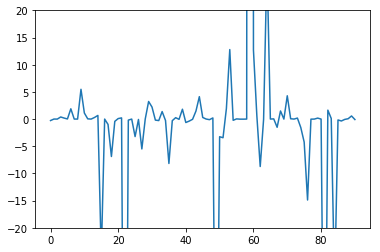

In [48]:
plt.plot(np.arange(len(diffBetweenIMFCT.ExportDiff)),diffBetweenIMFCT.ExportDiff)
plt.ylim(-20,20)
plt.show()

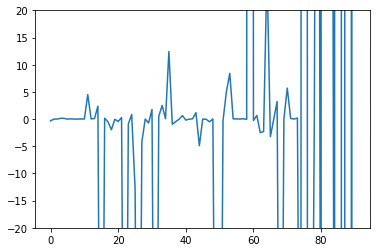

In [49]:
plt.plot(np.arange(len(diffBetweenIMFCT.ImportDiff)),diffBetweenIMFCT.ImportDiff)
plt.ylim(-20,20)
plt.show()

## Reading in the new global1

In [50]:
data_1_new = pd.read_csv('global1.csv',index_col=0).fillna(value=0)

In [51]:
data_1_new

,Country,Export-Total-2013 (1000USD),Import-Total-2013 (1000USD),Export-Total-2014 (1000USD),Import-Total-2014 (1000USD),Export-Total-2015 (1000USD),Import-Total-2015 (1000USD),Export-Total-2016 (1000USD),Import-Total-2016 (1000USD),Export-Total-2017 (1000USD),Import-Total-2017 (1000USD)
Code,,,,,,,,,,,
ABW,Aruba,5.288326e+05,2.292014e+06,5.024095e+05,2.677611e+06,2.938773e+05,1.593865e+06,1.385415e+05,9.545045e+05,1.438578e+05,8.950373e+05
AFG,Afghanistan,6.950945e+05,4.922368e+06,8.004470e+05,4.764220e+06,8.231962e+05,4.255556e+06,1.118092e+06,3.439550e+06,8.659070e+05,2.107016e+06
AGO,Angola,7.292474e+07,7.109598e+06,6.559066e+07,6.050937e+06,3.849115e+07,3.384043e+06,2.769909e+07,2.588261e+06,3.291025e+07,2.457771e+06
AIA,Anguilla,1.074897e+03,2.237731e+04,1.516327e+03,3.365393e+04,1.477610e+03,1.589301e+04,1.937749e+03,8.082788e+03,2.997940e+02,1.899262e+04
ALA,Aland Islands,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
ALB,Albania,1.504790e+06,1.871671e+06,1.135308e+06,1.633350e+06,8.890187e+05,1.310262e+06,8.071587e+05,1.246335e+06,8.234779e+05,1.202771e+06
AND,Andorra,2.392569e+05,3.087229e+05,3.367095e+05,3.228443e+05,8.079179e+03,2.263657e+05,3.224153e+04,2.140512e+05,2.542940e+04,2.338133e+05
ARE,United Arab Emirates,2.223735e+08,9.342405e+07,2.724474e+08,8.184246e+07,1.293292e+08,6.191830e+07,1.220072e+08,7.015186e+07,1.174956e+08,5.285824e+07
ARG,Argentina,5.375341e+07,1.636156e+07,4.851094e+07,1.604686e+07,4.280380e+07,1.117112e+07,4.336439e+07,8.722876e+06,4.348388e+07,1.114861e+07


In [52]:
data_1_new = data_1_new.drop(['Country'],axis=1)
data_1_new = data_1_new[['Export-Total-2017 (1000USD)','Import-Total-2017 (1000USD)']]
data_1_new = data_1_new/1000
data_1_new = data_1_new[[True if country in list(data_3_re.index) else False for country in data_1_new.index]]

In [53]:
data_1_new = data_1_new.sort_index()

In [54]:
data_1_new.head()

,Export-Total-2017 (1000USD),Import-Total-2017 (1000USD)
Code,,
ABW,143.857801,895.037331
ALB,823.477932,1202.771309
AND,25.429396,233.813307
ARE,117495.645500,52858.243530
ARG,43483.884200,11148.613190


In [55]:
# Are the data pulled from RT equal to global1?
list(data_1_new.iloc[:,0])==list(data_4_re.iloc[:,0])

True

In [56]:
# Are the data pulled from RT equal to global1?
list(data_1_new.iloc[:,1])==list(data_4_re.iloc[:,1])

True